<a href="https://colab.research.google.com/github/muditmathur2020/FraudulentExpenses/blob/main/fraud_detection_in_expenses_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==2.0.3
!pip install numpy==1.23.5
!pip install keras==2.12.0

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.ensemble import *
warnings.filterwarnings('ignore')
from scipy import stats
pd.set_option('display.max_columns', None)

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/transactions.txt')
df = pd.read_json('/content/drive/MyDrive/transactions.txt', lines=True)

In [ ]:
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.00,,,,False,,,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,True,,,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1283.28,,,,False,,,False,False


In [ ]:
# Exploratory Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [ ]:
# Checking for null values
df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [ ]:
# No missing data! No, But that isn't the case we see we have empty spaces

In [ ]:
(df.applymap(lambda x: x == "").sum())

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [ ]:
# Percentage of empty values

100*(df.applymap(lambda x: x == "").sum())/df.shape[0]

accountNumber                 0.000000
customerId                    0.000000
creditLimit                   0.000000
availableMoney                0.000000
transactionDateTime           0.000000
transactionAmount             0.000000
merchantName                  0.000000
acqCountry                    0.580139
merchantCountryCode           0.092069
posEntryMode                  0.515538
posConditionCode              0.052012
merchantCategoryCode          0.000000
currentExpDate                0.000000
accountOpenDate               0.000000
dateOfLastAddressChange       0.000000
cardCVV                       0.000000
enteredCVV                    0.000000
cardLast4Digits               0.000000
transactionType               0.088763
echoBuffer                  100.000000
currentBalance                0.000000
merchantCity                100.000000
merchantState               100.000000
merchantZip                 100.000000
cardPresent                   0.000000
posOnPremises            

In [ ]:
# Need to remove columns where percentage is >50%
empty_string_percentage = (100 * df.applymap(lambda x: x == "").sum()) / df.shape[0]
columns_with_more_than_50_percent_empty = empty_string_percentage[empty_string_percentage > 50]
columns_with_more_than_50_percent_empty = columns_with_more_than_50_percent_empty.index.tolist()
print(columns_with_more_than_50_percent_empty)

['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']


In [ ]:
df.drop(columns_with_more_than_50_percent_empty, axis=1, inplace=True)

In [ ]:
df = df.replace("", "Information Not Available")

In [ ]:
"""
These columns can be used to identify an exact expense

accountNumber
customerId
cardCVV
enteredCVV
cardLast4Digits

So we need to delete it!
"""

'\nThese columns can be used to identify an exact expense\n\naccountNumber\ncustomerId\ncardCVV\nenteredCVV\ncardLast4Digits\n\nSo we need to delete it!\n'

In [ ]:
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


In [ ]:
columns_used_to_identify = ['accountNumber','customerId','cardCVV','enteredCVV','cardLast4Digits']
df.drop(columns_used_to_identify, axis=1, inplace=True)

In [ ]:
df.isFraud.value_counts()

isFraud
False    773946
True      12417
Name: count, dtype: int64

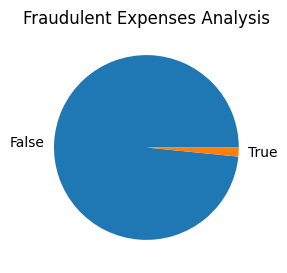

In [ ]:
plt.figure(figsize=(3,3))

df.isFraud.value_counts().plot(kind='pie')
plt.title("Fraudulent Expenses Analysis")
plt.ylabel("")
plt.xlabel("")
plt.show()

In [ ]:
"""
Reversal transaction refers to situations where a client has sent the money but it is
yet to be received by the merchant's account.
While it is still being processed, the transaction can be reversed.
"""

df.transactionType.value_counts()

transactionType
PURCHASE                     745193
REVERSAL                      20303
ADDRESS_VERIFICATION          20169
Information Not Available       698
Name: count, dtype: int64

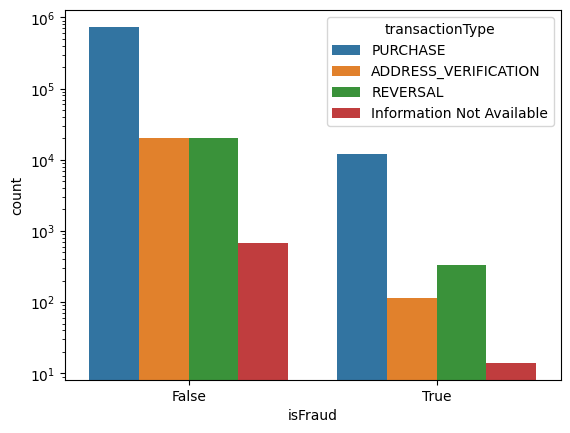

In [ ]:
sns.countplot(x="isFraud", data=df, hue="transactionType")
plt.yscale('log')
plt.show()

In [ ]:
# Reversal transactions are high in Fraudulent Cases, so we one-hot encode it can become a good feature

In [ ]:
columns_which_are_datetype = ['accountOpenDate','dateOfLastAddressChange','transactionDateTime']
for col in columns_which_are_datetype:
    df[col] = pd.to_datetime(df[col])
df[columns_which_are_datetype].dtypes

accountOpenDate            datetime64[ns]
dateOfLastAddressChange    datetime64[ns]
transactionDateTime        datetime64[ns]
dtype: object

In [ ]:
"""
Days sinces last address change can be a good indicator of risk
daysSinceLastAddressChange
"""

df['daysSinceLastAddressChange'] = (df.dateOfLastAddressChange - df.accountOpenDate).dt.days
df['daysSinceLastAddressChange']

0         0
1         0
2         0
3         0
4         0
         ..
786358    0
786359    0
786360    0
786361    0
786362    0
Name: daysSinceLastAddressChange, Length: 786363, dtype: int64

In [ ]:
df['daysSinceLastAddressChange'].value_counts()

daysSinceLastAddressChange
0       373076
560       2692
656       2411
581       2267
465       2261
         ...  
1476         2
1522         1
1143         1
3115         1
1424         1
Name: count, Length: 1349, dtype: int64

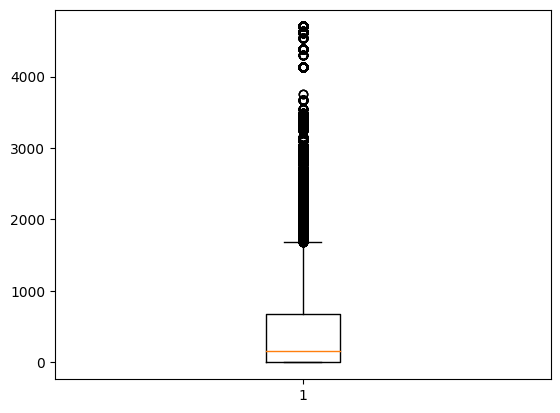

In [ ]:
plt.boxplot(df['daysSinceLastAddressChange'])
plt.show()

In [ ]:
# There are outliers in the dataset, IQR can be a great technique to identify outliers

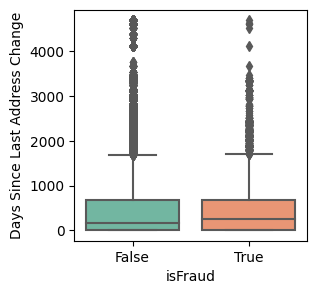

In [ ]:
plt.figure(figsize=(3, 3))
sns.boxplot(x='isFraud', y='daysSinceLastAddressChange', data=df, palette="Set2")

plt.xlabel('isFraud')
plt.ylabel('Days Since Last Address Change')

plt.show()

In [ ]:
# Days since last address change have similar properties in both the classes

In [ ]:
df

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,daysSinceLastAddressChange
0,5000,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,PURCHASE,0.00,False,False,False,0
1,5000,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,PURCHASE,0.00,True,False,False,0
2,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE,0.00,False,False,False,0
3,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE,0.00,False,False,False,0
4,5000,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,PURCHASE,0.00,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,2016-12-22 18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,PURCHASE,1095.04,False,False,False,0
786359,50000,48785.04,2016-12-25 16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,PURCHASE,1214.96,False,False,False,0
786360,50000,48766.15,2016-12-27 15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,PURCHASE,1233.85,False,False,False,0
786361,50000,48716.72,2016-12-29 00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,PURCHASE,1283.28,False,False,False,0


In [ ]:
# 24 hour format
# Take the time from the column and creating buckets such that it realizes at what time most frauds occur
# Ideally it shall be late in night as people don't see SMS messages etc

df['timeCategory'] = pd.cut(df['transactionDateTime'].dt.hour,
                            bins=range(0, 25, 2), right=False,
                            labels=[f'{i:02d}-{i+2:02d}' for i in range(0, 24, 2)])

df[['transactionDateTime', 'timeCategory']]

,transactionDateTime,timeCategory
0,2016-08-13 14:27:32,14-16
1,2016-10-11 05:05:54,04-06
2,2016-11-08 09:18:39,08-10
3,2016-12-10 02:14:50,02-04
4,2016-03-24 21:04:46,20-22
...,...,...
786358,2016-12-22 18:44:12,18-20
786359,2016-12-25 16:20:34,16-18
786360,2016-12-27 15:46:24,14-16
786361,2016-12-29 00:30:55,00-02


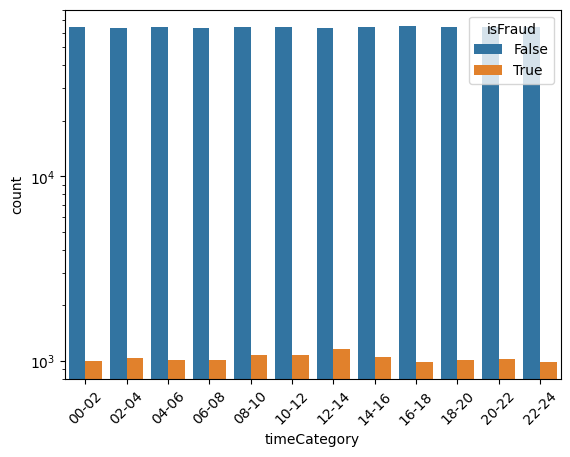

In [ ]:
sns.countplot(x='timeCategory', hue='isFraud', data=df)
plt.xticks(rotation=45)
plt.yscale('log')

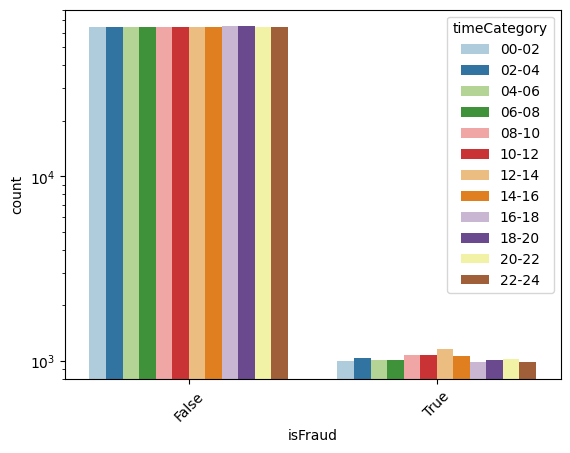

In [ ]:
sns.countplot(x='isFraud', hue='timeCategory', data=df, palette = "Paired")
plt.xticks(rotation=45)
plt.yscale('log')

In [ ]:
# Contrary to popular belive most fraud occur around mid-day at around 12

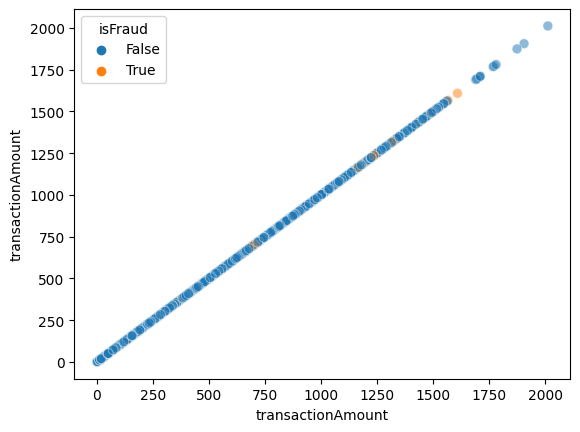

In [ ]:
sns.scatterplot(data=df, y='transactionAmount', x='transactionAmount', hue='isFraud', alpha=0.5, s=50)
plt.show()

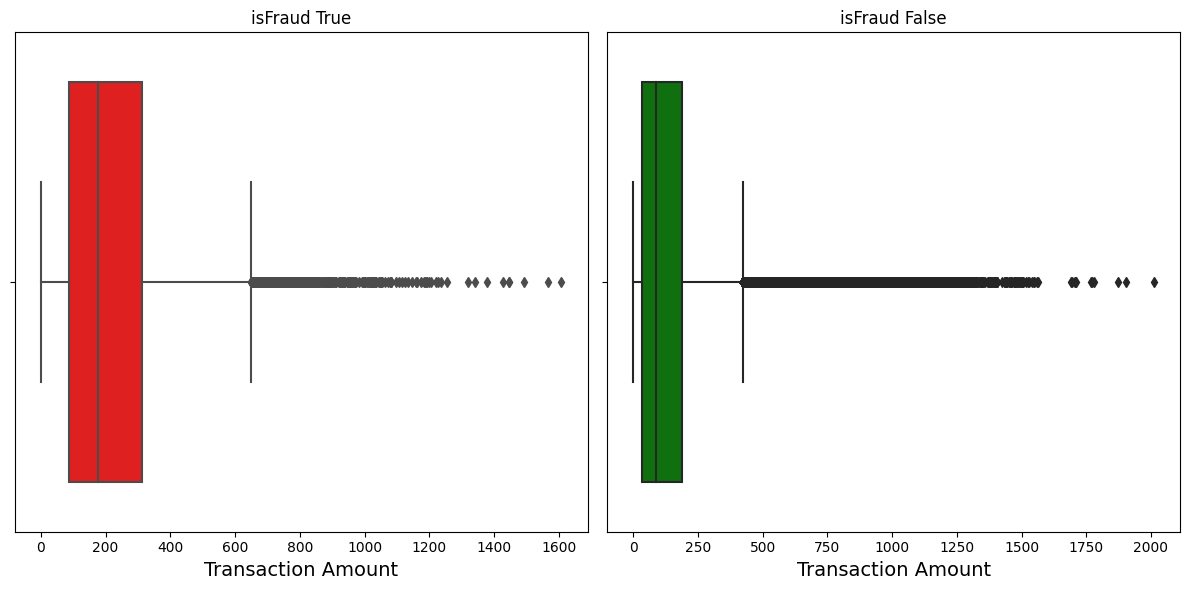

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df[df['isFraud'] == True], x='transactionAmount', color='red', ax=axes[0])
axes[0].set_title('isFraud True')
sns.boxplot(data=df[df['isFraud'] == False], x='transactionAmount', color='green', ax=axes[1])
axes[1].set_title('isFraud False')

axes[0].set_xlabel('Transaction Amount', fontsize=14)
axes[1].set_xlabel('Transaction Amount', fontsize=14)
plt.tight_layout()

plt.show()

In [ ]:
# We can one-hot encode

df['merchantCategoryCode'].value_counts()

merchantCategoryCode
online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: count, dtype: int64

In [ ]:
# Too many merchants to one-hot encode, we can try grouping them

df['merchantName'].value_counts()

merchantName
Uber                             25613
Lyft                             25523
oldnavy.com                      16992
staples.com                      16980
alibaba.com                      16959
                                 ...  
Sprint Communications #561941        2
Runners #383214                      2
Curves #849125                       1
EZ Wireless #149871                  1
TMobile Wireless #602341             1
Name: count, Length: 2490, dtype: int64

In [ ]:
most_frauds_occur_at_merchant = df[df.isFraud == True]['merchantName'].value_counts().head(50).index.tolist()
most_frauds_occur_at_merchant

['Lyft',
 'ebay.com',
 'Fresh Flowers',
 'Uber',
 'walmart.com',
 'cheapfast.com',
 'sears.com',
 'oldnavy.com',
 'staples.com',
 'alibaba.com',
 'amazon.com',
 'gap.com',
 'target.com',
 'apple.com',
 'discount.com',
 'American Airlines',
 'Blue Mountain Online Services',
 'Fresh eCards',
 'Next Day Online Services',
 'Blue Mountain eCards',
 'Mobile eCards',
 'Fresh Online Services',
 'Next Day eCards',
 'Delta Airlines',
 'Regal Cinemas #05791',
 'EZ Putt Putt #69446',
 'EZ Putt Putt #40513',
 'EZ Putt Putt #551896',
 'Regal Cinemas #276341',
 'Regal Cinemas #729464',
 'EZ Putt Putt #755869',
 'EZ Putt Putt #804489',
 'United Airlines',
 'EZ Putt Putt #240241',
 'EZ Putt Putt #503815',
 'Convenient Auto Services',
 'EZ Putt Putt #982199',
 'Virgin Airlines',
 'Icelandic Airlines',
 'AMC #692956',
 'Dinosaur Restaurant',
 'AMC #128743',
 'Best Pub',
 'AMC #74121',
 'NY BBQ',
 'AMC #79863',
 'Washington Tire',
 'San Francisco Post',
 'AMC #145832',
 'ethanallen.com']

In [ ]:
most_common_merchants = df['merchantName'].value_counts().head(50).index.tolist()
most_common_merchants

['Uber',
 'Lyft',
 'oldnavy.com',
 'staples.com',
 'alibaba.com',
 'apple.com',
 'walmart.com',
 'cheapfast.com',
 'ebay.com',
 'target.com',
 'amazon.com',
 'sears.com',
 'discount.com',
 'gap.com',
 'Fresh Online Services',
 'Blue Mountain eCards',
 'Fresh Flowers',
 'Next Day eCards',
 'Next Day Online Services',
 'Fresh eCards',
 'Blue Mountain Online Services',
 'Mobile eCards',
 'Apple iTunes',
 'Play Store',
 'EZ Putt Putt #40513',
 'EZ Putt Putt #982199',
 'AMC #145832',
 'EZ Putt Putt #69446',
 'Regal Cinemas #05791',
 'Regal Cinemas #276341',
 'AMC #724446',
 'AMC #191138',
 'AMC #692956',
 'EZ Putt Putt #503815',
 'EZ Putt Putt #804489',
 'AMC #606218',
 'EZ Putt Putt #551896',
 'EZ Putt Putt #755869',
 'AMC #74121',
 'EZ Putt Putt #240241',
 'AMC #79863',
 'AMC #128743',
 'Regal Cinemas #729464',
 'AMC #706324',
 'AMC #552863',
 'American Airlines',
 'United Airlines',
 'Delta Airlines',
 'Icelandic Airlines',
 'Virgin Airlines']

In [ ]:
merchants_related_columns = list(set(most_common_merchants + most_frauds_occur_at_merchant))
len(merchants_related_columns)

57

In [ ]:
# What percent of expense amount is of credit limit
df['transactionPercentageCreditLimit'] = df['transactionAmount']/df['creditLimit']

# How much %money is left from credit limit
df['utilizationPercentage'] = 1-(df['availableMoney']/df['creditLimit'])

In [ ]:
df['isFraud'] = np.where(df['isFraud'] == True, 1, 0)

In [ ]:
df

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,daysSinceLastAddressChange,timeCategory,transactionPercentageCreditLimit,utilizationPercentage
0,5000,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,PURCHASE,0.00,False,False,0,0,14-16,0.019710,0.000000
1,5000,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,PURCHASE,0.00,True,False,0,0,04-06,0.014902,0.000000
2,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE,0.00,False,False,0,0,08-10,0.001494,0.000000
3,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,PURCHASE,0.00,False,False,0,0,02-04,0.001494,0.000000
4,5000,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,PURCHASE,0.00,True,False,0,0,20-22,0.014236,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,2016-12-22 18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,PURCHASE,1095.04,False,False,0,0,18-20,0.002398,0.021901
786359,50000,48785.04,2016-12-25 16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,PURCHASE,1214.96,False,False,0,0,16-18,0.000378,0.024299
786360,50000,48766.15,2016-12-27 15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,PURCHASE,1233.85,False,False,0,0,14-16,0.000989,0.024677
786361,50000,48716.72,2016-12-29 00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,PURCHASE,1283.28,False,False,0,0,00-02,0.000998,0.025666


In [ ]:
df['cardPresent'].value_counts()

cardPresent
False    433495
True     352868
Name: count, dtype: int64

In [ ]:
df['expirationDateKeyInMatch'].value_counts()

expirationDateKeyInMatch
False    785320
True       1043
Name: count, dtype: int64

In [ ]:
df['acqCountry'].value_counts()

acqCountry
US                           774709
Information Not Available      4562
MEX                            3130
CAN                            2424
PR                             1538
Name: count, dtype: int64

In [ ]:
df = df.replace('Information Not Available',np.NaN)

In [ ]:
df['isFraud'].value_counts(dropna=False)

isFraud
0    773946
1     12417
Name: count, dtype: int64

In [ ]:

df=df.reset_index()

In [ ]:
df=df.replace(True,1)
df=df.replace(False,0)
df= df.drop(['transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange'], axis=1)
df.head()

,index,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,daysSinceLastAddressChange,timeCategory,transactionPercentageCreditLimit,utilizationPercentage
0,0,5000,5000.0,98.55,Uber,US,US,02,01,rideshare,PURCHASE,0.0,0,0,0,0,14-16,0.019710,0.0
1,1,5000,5000.0,74.51,AMC #191138,US,US,09,01,entertainment,PURCHASE,0.0,1,0,0,0,04-06,0.014902,0.0
2,2,5000,5000.0,7.47,Play Store,US,US,09,01,mobileapps,PURCHASE,0.0,0,0,0,0,08-10,0.001494,0.0
3,3,5000,5000.0,7.47,Play Store,US,US,09,01,mobileapps,PURCHASE,0.0,0,0,0,0,02-04,0.001494,0.0
4,4,5000,5000.0,71.18,Tim Hortons #947751,US,US,02,01,fastfood,PURCHASE,0.0,1,0,0,0,20-22,0.014236,0.0


In [ ]:
categorical_columns = df.select_dtypes(include=['category','object']).columns
categorical_columns
for i in df.columns.to_list():
  if i not in categorical_columns:
    df[i]=df[i].fillna(0)

In [ ]:
df['timeCategory']=df['timeCategory'].astype(str)

In [ ]:
var=['merchantName','acqCountry','merchantCategoryCode','merchantCountryCode','transactionType','timeCategory']

lst1=[]


for i in var:
    pivot_df=df.pivot_table(index=i,columns='isFraud',values='index',aggfunc='count').reset_index()
    pivot_df=pivot_df.rename(columns={pivot_df.columns[1]:'non_target',pivot_df.columns[2]:'target'})
    pivot_df['total']=pivot_df['non_target']+pivot_df['target']
    pivot_df['Population %']=round(pivot_df['total'].apply(lambda x: (x/pivot_df['total'].sum())*100),2)
    pivot_df['Target ratio %']=round((pivot_df['target']/pivot_df['total'])*100,2)
    pivot_df['Non Target %']=round(pivot_df['non_target'].apply(lambda x: (x/pivot_df['non_target'].sum())*100),2)
    pivot_df['Target %']=round(pivot_df['target'].apply(lambda x: (x/pivot_df['target'].sum())*100),2)
    pivot_df['GB Odds']=round((pivot_df['Target %']/pivot_df['Non Target %']),2)
    pivot_df['WOE']=round((np.log(pivot_df['GB Odds'])),2)
    pivot_df['iv']=(pivot_df['WOE']*(pivot_df['Target %']-pivot_df['Non Target %']))/100
    pivot_df.replace([np.inf,-np.inf],0,inplace=True)
    target_ratio=pivot_df['target'].sum()/pivot_df['total'].sum()
    pivot_df=pivot_df.fillna(0)
    pivot_df['iv']=pivot_df['iv'].astype(float)
    pivot_df.loc['Total']=pivot_df[['non_target','target','total','Population %','Non Target %','Target %','iv']].sum()
    pivot_df.at[pivot_df.index[-1],'Target ratio %']=round(target_ratio*100,2)
    vars()[i]=pivot_df.copy()
    lst1.append(vars()[i])

In [ ]:
df=pd.merge(df,merchantName[['merchantName','WOE']],on='merchantName',how='left')
df.rename(columns={'WOE':'merchantName_woe'},inplace=True)
df=pd.merge(df,acqCountry[['acqCountry','WOE']],on='acqCountry',how='left')
df.rename(columns={'WOE':'acqCountry_woe'},inplace=True)
df=pd.merge(df,merchantCategoryCode[['merchantCategoryCode','WOE']],on='merchantCategoryCode',how='left')
df.rename(columns={'WOE':'merchantCategoryCode_woe'},inplace=True)
df=pd.merge(df,merchantCountryCode[['merchantCountryCode','WOE']],on='merchantCountryCode',how='left')
df.rename(columns={'WOE':'merchantCountryCode_woe'},inplace=True)
df=pd.merge(df,transactionType[['transactionType','WOE']],on='transactionType',how='left')
df.rename(columns={'WOE':'transactionType_woe'},inplace=True)
df=pd.merge(df,timeCategory[['timeCategory','WOE']],on='timeCategory',how='left')
df.rename(columns={'WOE':'timeCategory_woe'},inplace=True)
df.head()

,index,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,daysSinceLastAddressChange,timeCategory,transactionPercentageCreditLimit,utilizationPercentage,merchantName_woe,acqCountry_woe,merchantCategoryCode_woe,merchantCountryCode_woe,transactionType_woe,timeCategory_woe
0,0,5000,5000.0,98.55,Uber,US,US,02,01,rideshare,PURCHASE,0.0,0,0,0,0,14-16,0.019710,0.0,0.24,0.0,0.46,0.0,0.02,0.02
1,1,5000,5000.0,74.51,AMC #191138,US,US,09,01,entertainment,PURCHASE,0.0,1,0,0,0,04-06,0.014902,0.0,-1.11,0.0,-0.27,0.0,0.02,-0.02
2,2,5000,5000.0,7.47,Play Store,US,US,09,01,mobileapps,PURCHASE,0.0,0,0,0,0,08-10,0.001494,0.0,0.00,0.0,0.00,0.0,0.02,0.04
3,3,5000,5000.0,7.47,Play Store,US,US,09,01,mobileapps,PURCHASE,0.0,0,0,0,0,02-04,0.001494,0.0,0.00,0.0,0.00,0.0,0.02,0.01
4,4,5000,5000.0,71.18,Tim Hortons #947751,US,US,02,01,fastfood,PURCHASE,0.0,1,0,0,0,20-22,0.014236,0.0,0.00,0.0,-0.51,0.0,0.02,-0.01


In [ ]:
df=df.drop(['merchantName','acqCountry','merchantCategoryCode','merchantCountryCode','transactionType','timeCategory'], axis=1)
df.head()

,index,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,daysSinceLastAddressChange,transactionPercentageCreditLimit,utilizationPercentage,merchantName_woe,acqCountry_woe,merchantCategoryCode_woe,merchantCountryCode_woe,transactionType_woe,timeCategory_woe
0,0,5000,5000.0,98.55,02,01,0.0,0,0,0,0,0.019710,0.0,0.24,0.0,0.46,0.0,0.02,0.02
1,1,5000,5000.0,74.51,09,01,0.0,1,0,0,0,0.014902,0.0,-1.11,0.0,-0.27,0.0,0.02,-0.02
2,2,5000,5000.0,7.47,09,01,0.0,0,0,0,0,0.001494,0.0,0.00,0.0,0.00,0.0,0.02,0.04
3,3,5000,5000.0,7.47,09,01,0.0,0,0,0,0,0.001494,0.0,0.00,0.0,0.00,0.0,0.02,0.01
4,4,5000,5000.0,71.18,02,01,0.0,1,0,0,0,0.014236,0.0,0.00,0.0,-0.51,0.0,0.02,-0.01


In [ ]:
X = df.drop(['isFraud'], axis=1)
X = X.fillna(0).replace(False,0).replace(True,1)

In [ ]:
X

,index,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,currentBalance,cardPresent,expirationDateKeyInMatch,daysSinceLastAddressChange,transactionPercentageCreditLimit,utilizationPercentage,merchantName_woe,acqCountry_woe,merchantCategoryCode_woe,merchantCountryCode_woe,transactionType_woe,timeCategory_woe
0,0,5000,5000.00,98.55,02,01,0.00,0,0,0,0.019710,0.000000,0.24,0.0,0.46,0.0,0.02,0.02
1,1,5000,5000.00,74.51,09,01,0.00,1,0,0,0.014902,0.000000,-1.11,0.0,-0.27,0.0,0.02,-0.02
2,2,5000,5000.00,7.47,09,01,0.00,0,0,0,0.001494,0.000000,0.00,0.0,0.00,0.0,0.02,0.04
3,3,5000,5000.00,7.47,09,01,0.00,0,0,0,0.001494,0.000000,0.00,0.0,0.00,0.0,0.02,0.01
4,4,5000,5000.00,71.18,02,01,0.00,1,0,0,0.014236,0.000000,0.00,0.0,-0.51,0.0,0.02,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,786358,50000,48904.96,119.92,90,01,1095.04,0,0,0,0.002398,0.021901,0.65,0.0,0.46,0.0,0.02,-0.03
786359,786359,50000,48785.04,18.89,09,01,1214.96,0,0,0,0.000378,0.024299,0.00,0.0,0.00,0.0,0.02,-0.05
786360,786360,50000,48766.15,49.43,02,01,1233.85,0,0,0,0.000989,0.024677,0.65,0.0,0.46,0.0,0.02,0.02
786361,786361,50000,48716.72,49.89,09,99,1283.28,0,0,0,0.000998,0.025666,0.52,0.0,0.44,0.0,0.02,-0.04


In [ ]:
y = df['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape

((629090, 18), (157273, 18))

In [ ]:
# Define the Focal Loss function
class FocalLoss(tf.keras.losses.Loss):
    def __init__(self, alpha=0.25, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def call(self, y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0 - 1e-7)
        focal_loss = -self.alpha * (y_true * (1.0 - y_pred) ** self.gamma * tf.math.log(y_pred) +
                                   (1.0 - y_true) * y_pred ** self.gamma * tf.math.log(1.0 - y_pred))
        return tf.reduce_mean(focal_loss)

In [ ]:
scaler = StandardScaler()

# X_train2 is there because I don't want to replace X_train as it could be used for ML models
X_train = scaler.fit_transform(X_train)

model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(64, activation='relu'),     # Hidden layer with ReLU activation
    keras.layers.Dropout(0.2),                     # Dropout layer for regularization
    keras.layers.Dense(1, activation='sigmoid')    # Output layer with sigmoid activation for binary classification
])

model.compile(optimizer='adam', loss=FocalLoss(), metrics=[tf.keras.metrics.Recall()])

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
19660/19660 [==============================] - 59s 3ms/step - loss: 0.0059 - recall: 6.0399e-04
Epoch 2/10
19660/19660 [==============================] - 53s 3ms/step - loss: 0.0056 - recall: 1.0066e-04
Epoch 3/10
19660/19660 [==============================] - 54s 3ms/step - loss: 0.0056 - recall: 4.0266e-04
Epoch 4/10
19660/19660 [==============================] - 53s 3ms/step - loss: 0.0055 - recall: 5.0332e-04
Epoch 5/10
19660/19660 [==============================] - 53s 3ms/step - loss: 0.0055 - recall: 8.0532e-04
Epoch 6/10
19660/19660 [==============================] - 53s 3ms/step - loss: 0.0055 - recall: 9.0598e-04
Epoch 7/10
19660/19660 [==============================] - 53s 3ms/step - loss: 0.0055 - recall: 0.0017
Epoch 8/10
19660/19660 [==============================] - 53s 3ms/step - loss: 0.0055 - recall: 0.0013
Epoch 9/10
19660/19660 [==============================] - 53s 3ms/step - loss: 0.0055 - recall: 0.0010
Epoch 10/10
19660/19660 [========================

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
# Make predictions on the test data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

4915/4915 [==============================] - 6s 1ms/step


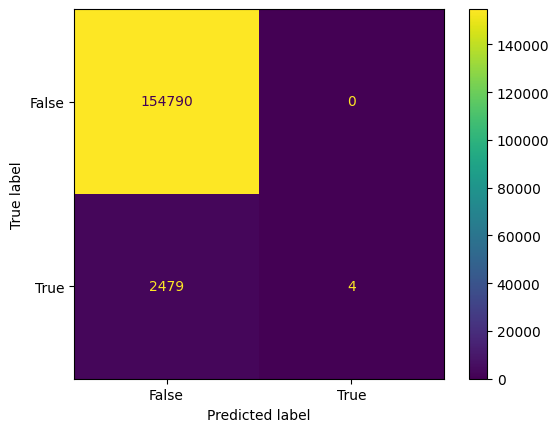

In [ ]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154790
           1       1.00      0.00      0.00      2483

    accuracy                           0.98    157273
   macro avg       0.99      0.50      0.50    157273
weighted avg       0.98      0.98      0.98    157273

[[154790      0]
 [  2479      4]]


In [ ]:
y_pred_proba=y_pred_proba.flatten()

<Axes: ylabel='Density'>

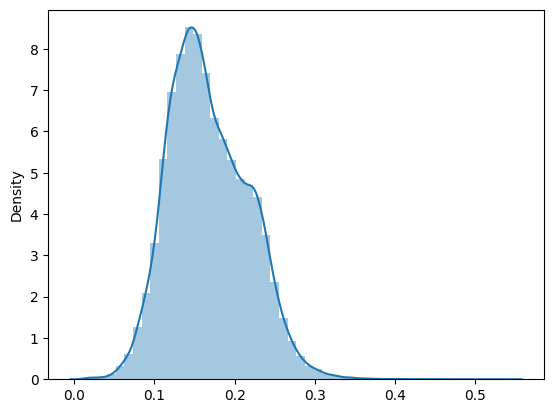

In [ ]:
sns.distplot(y_pred_proba)

In [ ]:
pd.Series(y_pred_proba).describe()

count    157273.000000
mean          0.167698
std           0.049337
min           0.009296
25%           0.131423
50%           0.161541
75%           0.202625
max           0.543977
dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape

((629090, 18), (157273, 18))

In [ ]:
X_test

,index,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,currentBalance,cardPresent,expirationDateKeyInMatch,daysSinceLastAddressChange,transactionPercentageCreditLimit,utilizationPercentage,merchantName_woe,acqCountry_woe,merchantCategoryCode_woe,merchantCountryCode_woe,transactionType_woe,timeCategory_woe
129848,129848,2500,2500.00,270.41,02,08,0.00,0,0,0,0.108164,0.000000,-0.62,0.0,-0.22,0.0,0.02,-0.02
769428,769428,7500,6698.47,91.00,05,01,801.53,0,0,592,0.012133,0.106871,0.90,0.0,0.44,0.0,0.02,-0.02
332745,332745,15000,2834.54,138.79,05,08,12165.46,0,0,928,0.009253,0.811031,0.30,0.0,0.44,0.0,0.02,-0.02
564712,564712,15000,14055.09,112.62,05,01,944.91,0,0,0,0.007508,0.062994,0.30,0.0,0.44,0.0,0.02,0.04
189848,189848,5000,2433.31,330.18,05,08,2566.69,1,0,0,0.066036,0.513338,0.00,0.0,-0.51,0.0,0.02,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68637,68637,7500,1667.16,427.37,05,01,5832.84,1,0,0,0.056983,0.777712,0.69,0.0,-0.51,0.0,0.02,0.01
8026,8026,50000,47348.25,9.74,05,08,2651.75,1,0,0,0.000195,0.053035,0.41,0.0,-0.16,0.0,0.02,-0.02
541574,541574,250,67.79,69.16,02,01,182.21,0,0,0,0.276640,0.728840,0.35,0.0,0.44,0.0,0.02,0.02
677744,677744,50000,48937.72,100.74,05,01,1062.28,0,0,198,0.002015,0.021246,0.24,0.0,0.46,0.0,0.02,0.04


In [ ]:
data=X_test.copy()
data['probabilties']=y_pred_proba*100

In [ ]:
data['bins']=np.NaN

In [ ]:
data.loc[(data['probabilties']>=0) & (data['probabilties']<10),'bins']=1
data.loc[(data['probabilties']>=10) & (data['probabilties']<20),'bins']=2
data.loc[(data['probabilties']>=20) & (data['probabilties']<30),'bins']=3
data.loc[(data['probabilties']>=30) & (data['probabilties']<40),'bins']=4
data.loc[(data['probabilties']>=40) & (data['probabilties']<50),'bins']=5
data.loc[(data['probabilties']>=50) & (data['probabilties']<60),'bins']=6
data.loc[(data['probabilties']>=60) & (data['probabilties']<70),'bins']=7
data.loc[(data['probabilties']>=70) & (data['probabilties']<80),'bins']=8
data.loc[(data['probabilties']>=80) & (data['probabilties']<90),'bins']=9
data.loc[(data['probabilties']>=90),'bins']=10

In [ ]:
data['bins'].value_counts(dropna=False).sort_index()

bins
1.0      9982
2.0    105896
3.0     40420
4.0       935
5.0        36
6.0         4
Name: count, dtype: int64

In [ ]:
data.sort_values(by='probabilties',inplace=True,ascending=False)

In [ ]:
data

,index,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,currentBalance,cardPresent,expirationDateKeyInMatch,daysSinceLastAddressChange,transactionPercentageCreditLimit,utilizationPercentage,merchantName_woe,acqCountry_woe,merchantCategoryCode_woe,merchantCountryCode_woe,transactionType_woe,timeCategory_woe,probabilties,bins
58011,58011,5000,434.76,122.43,09,01,4565.24,1,0,758,0.024486,0.913048,2.08,0.0,-0.51,0.0,0.02,0.03,54.397659,6.0
58869,58869,5000,452.85,142.33,09,01,4547.15,1,0,790,0.028466,0.909430,2.08,0.0,-0.51,0.0,0.02,-0.05,53.304314,6.0
55608,55608,5000,392.35,214.30,05,01,4607.65,1,0,677,0.042860,0.921530,2.08,0.0,-0.51,0.0,0.02,0.02,53.109180,6.0
57905,57905,5000,822.52,277.85,09,01,4177.48,1,0,758,0.055570,0.835496,2.08,0.0,-0.51,0.0,0.02,-0.01,51.666611,6.0
57792,57792,5000,2162.91,89.51,05,01,2837.09,1,0,751,0.017902,0.567418,1.95,0.0,-0.51,0.0,0.02,-0.02,49.735085,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126828,126828,10000,9260.87,0.44,02,01,739.13,1,1,0,0.000044,0.073913,-0.69,0.0,-0.78,0.0,0.02,0.01,1.125888,1.0
766056,766056,20000,2777.14,127.57,05,01,17222.86,1,1,1161,0.006378,0.861143,-1.39,0.0,-1.27,0.0,0.02,-0.02,1.089900,1.0
551381,551381,5000,4913.75,70.86,02,08,86.25,1,1,0,0.014172,0.017250,-1.61,0.0,-0.16,0.0,0.02,0.11,1.066754,1.0
326233,326233,15000,4713.49,99.74,09,01,10286.51,1,1,1993,0.006649,0.685767,-1.39,0.0,-1.27,0.0,0.02,-0.01,1.019792,1.0


In [ ]:
data['actual']=y_test
data['predicted']=data['probabilties'].apply(lambda x: 1 if x>=50 else 0)
data

,index,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,currentBalance,cardPresent,expirationDateKeyInMatch,daysSinceLastAddressChange,transactionPercentageCreditLimit,utilizationPercentage,merchantName_woe,acqCountry_woe,merchantCategoryCode_woe,merchantCountryCode_woe,transactionType_woe,timeCategory_woe,probabilties,bins,actual,predicted
58011,58011,5000,434.76,122.43,09,01,4565.24,1,0,758,0.024486,0.913048,2.08,0.0,-0.51,0.0,0.02,0.03,54.397659,6.0,1,1
58869,58869,5000,452.85,142.33,09,01,4547.15,1,0,790,0.028466,0.909430,2.08,0.0,-0.51,0.0,0.02,-0.05,53.304314,6.0,1,1
55608,55608,5000,392.35,214.30,05,01,4607.65,1,0,677,0.042860,0.921530,2.08,0.0,-0.51,0.0,0.02,0.02,53.109180,6.0,1,1
57905,57905,5000,822.52,277.85,09,01,4177.48,1,0,758,0.055570,0.835496,2.08,0.0,-0.51,0.0,0.02,-0.01,51.666611,6.0,1,1
57792,57792,5000,2162.91,89.51,05,01,2837.09,1,0,751,0.017902,0.567418,1.95,0.0,-0.51,0.0,0.02,-0.02,49.735085,5.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126828,126828,10000,9260.87,0.44,02,01,739.13,1,1,0,0.000044,0.073913,-0.69,0.0,-0.78,0.0,0.02,0.01,1.125888,1.0,0,0
766056,766056,20000,2777.14,127.57,05,01,17222.86,1,1,1161,0.006378,0.861143,-1.39,0.0,-1.27,0.0,0.02,-0.02,1.089900,1.0,0,0
551381,551381,5000,4913.75,70.86,02,08,86.25,1,1,0,0.014172,0.017250,-1.61,0.0,-0.16,0.0,0.02,0.11,1.066754,1.0,0,0
326233,326233,15000,4713.49,99.74,09,01,10286.51,1,1,1993,0.006649,0.685767,-1.39,0.0,-1.27,0.0,0.02,-0.01,1.019792,1.0,0,0


In [ ]:
print(classification_report(data[data['bins']==data['bins'].max()]['actual'],data[data['bins']==data['bins'].max()]['predicted']))
cm=confusion_matrix(data[data['bins']==data['bins'].max()]['actual'],data[data['bins']==data['bins'].max()]['predicted'])
print(cm)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[[4]]


In [ ]:
print(classification_report(data['actual'],data['predicted']))
cm=confusion_matrix(data['actual'],data['predicted'])
print(cm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154790
           1       1.00      0.00      0.00      2483

    accuracy                           0.98    157273
   macro avg       0.99      0.50      0.50    157273
weighted avg       0.98      0.98      0.98    157273

[[154790      0]
 [  2479      4]]


In [ ]:
data['bins'].value_counts()

bins
2.0    105896
3.0     40420
1.0      9982
4.0       935
5.0        36
6.0         4
Name: count, dtype: int64

In [ ]:
n_sample = 50 # This is my manual labour capacity
data.head(n_sample)['bins'].unique()

array([6., 5., 4.])

In [ ]:
print(classification_report(data['actual'].head(n_sample),data['predicted'].head(n_sample)))
cm=confusion_matrix(data['actual'].head(n_sample),data['predicted'].head(n_sample))
print(cm)

              precision    recall  f1-score   support

           0       0.57      1.00      0.72        26
           1       1.00      0.17      0.29        24

    accuracy                           0.60        50
   macro avg       0.78      0.58      0.50        50
weighted avg       0.77      0.60      0.51        50

[[26  0]
 [20  4]]
